In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
model = tf.keras.models.load_model('Fitting_model.h5')

W1018 19:07:27.446232 21148 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1018 19:07:27.448201 21148 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1018 19:07:27.449181 21148 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated an

In [3]:
big_df = pd.read_csv(r'D:\Graduation Project\QuadPlane Design\APC Propellers\PERFILES_WEB\all_props_cleaned_petite.csv')
dataset = big_df.copy()
dataset = dataset.dropna()

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_labels = train_dataset.pop('Thrust')
test_labels = test_dataset.pop('Thrust')

train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
V,234782.0,49.707743,45.637459,-42.0,13.6,36.20,73.8,319.6
diameter,234782.0,10.523603,4.487367,4.0,7.0,9.25,13.5,27.0
pitch,234782.0,7.308001,3.348207,2.0,4.5,6.50,10.0,22.5
rpm,234782.0,12508.699700,9050.014395,1000.0,6000.0,11000.00,17000.0,45000.0


In [5]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

Prop is available in dataset
only one prop


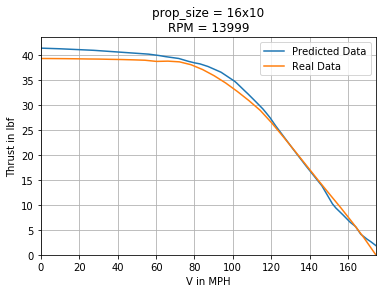

In [8]:
diam = 16
pitch = 10
rpm = 13999
V_values = list(np.linspace(0,200,num=800))

# Predicted Data:
T_values = []
for V_value in V_values:
    input_df = pd.DataFrame([V_value,diam,pitch,rpm]).T
    input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
    T_values.append(model.predict(norm(input_df))[0][0])
    
plt.plot(V_values, T_values, label='Predicted Data')

# Real Data:
prop_df = dataset.loc[dataset['diameter'] == diam].loc[dataset['pitch'] == pitch].loc[dataset['rpm'] == rpm]
if prop_df.shape[0] > 3:    # prop is available in the dataset
    print('Prop is available in dataset')
    if prop_df.loc[prop_df['V'] == 0].index.shape[0] > 1:    # if there are multiple similar props
        V_real = prop_df['V'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        T_real = prop_df['Thrust'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        print('found multiple props, only the first one is considered')
    else:    # Only one prop
        V_real = prop_df['V']
        T_real = prop_df['Thrust']
        print('only one prop')

    plt.plot(V_real, T_real, label='Real Data')
    plt.xlim([0,V_real.iloc[-1]])
else:
    print('Prop not available in dataset')


plt.ylim([0,plt.ylim()[1]])
plt.xlabel('V in MPH')
plt.ylabel('Thrust in lbf')
plt.title('prop_size = '+str(diam)+'x'+str(pitch)+'\nRPM = '+str(rpm))
plt.legend()
plt.grid(True)
plt.show()